In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive
import os
import matplotlib.pyplot as plt

In [ ]:
# Mount Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#path of training folder
train_path = '/content/drive/My Drive/Fruit 360 Original Dataset/Training'

#path of testing folder
test_path = '/content/drive/My Drive/Fruit 360 Original Dataset/Test'

#path of validation
valid_path = '/content/drive/My Drive/Fruit 360 Original Dataset/Validation'




#dataset_path = '/content/drive/My Drive/Cat-Dog-Dataset'
#os.listdir(dataset_path)

In [ ]:
#define input image attributes
img_width, img_height = 100, 100
#150x150 pixels and 3 channels, i.e., RGB
input_shape = (img_width, img_height, 3)

In [ ]:
#define model parameters
batch_size = 32
epochs = 50

In [ ]:
#CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(24, activation='sigmoid')  # Output layer, binary classification (cat or dog)
  ])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6231 images belonging to 24 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3110 images belonging to 24 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
194/194 [==============================] - 1288s 7s/step - loss: 1.6239 - accuracy: 0.4259 - val_loss: 1.1325 - val_accuracy: 0.5554
Epoch 2/50
194/194 [==============================] - 955s 5s/step - loss: 0.8080 - accuracy: 0.7107 - val_loss: 0.4715 - val_accuracy: 0.8196
Epoch 3/50
194/194 [==============================] - 766s 4s/step - loss: 0.4545 - accuracy: 0.8338 - val_loss: 0.2577 - val_accuracy: 0.9072
Epoch 4/50
194/194 [==============================] - 545s 3s/step - loss: 0.3820 - accuracy: 0.8628 - val_loss: 0.2112 - val_accuracy: 0.9343
Epoch 5/50
194/194 [==============================] - 489s 3s/step - loss: 0.4139 - accuracy: 0.8666 - val_loss: 0.1168 - val_accuracy: 0.9665
Epoch 6/50
194/194 [==============================] - 327s 2s/step - loss: 0.2137 - accuracy: 0.9265 - val_loss: 0.1913 - val_accuracy: 0.9291
Epoch 7/50
194/194 [==============================] - 314s 2s/step - loss: 0.2455 - accuracy: 0.9104 - val_loss: 0.1000 - val_accuracy: 0.963

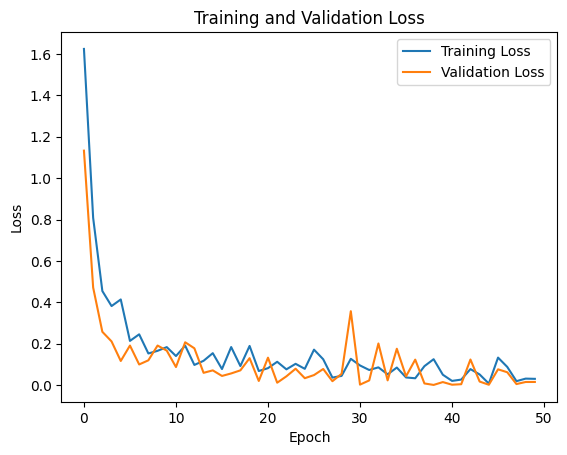

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

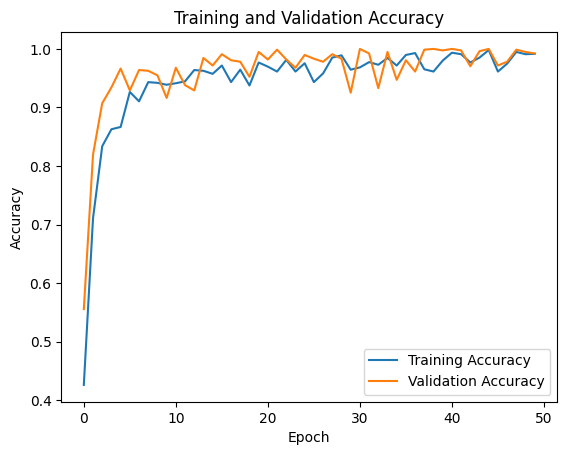

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


389/389 [==============================] - 29s 75ms/step - loss: 0.0127 - accuracy: 0.9961
Test Loss: 0.012669075280427933
Test Accuracy: 0.9961414933204651


In [1]:

import random

# Function to select a random image from the test directory
def get_random_image(test_path):
    class_folders = os.listdir(test_path)
    class_folders = [folder for folder in class_folders if not folder.startswith('.')]  # Exclude hidden files
    chosen_class = random.choice(class_folders)
    class_path = os.path.join(test_path, chosen_class)
    image_files = os.listdir(class_path)
    image_files = [file for file in image_files if file.endswith('.jpg') or file.endswith('.png')]  # Filter for image files
    chosen_image = random.choice(image_files)
    image_path = os.path.join(class_path, chosen_image)
    return image_path, chosen_class

# Get a random image and its original class label
img_path, original_label = get_random_image(test_path)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Convert single image to a batch.
img_array = img_array / 255.0  # Rescale image (same as done for training data)

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to the class label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Invert the dictionary to map index to class label
predicted_label = class_labels[predicted_class_index]

# Output the original and predicted labels
print(f"Original Label: {original_label}")
print(f"Predicted Label: {predicted_label}")

# Display the image
plt.imshow(img)
plt.title(f"Original: {original_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()


NameError: name 'test_path' is not defined

	zip warning: name not matched: my_folder_or_files

zip error: Nothing to do! (try: zip -r my_project.zip . -i my_folder_or_files)


FileNotFoundError: Cannot find file: my_project.zip